# 🎯 Projeto: Simulação Numérica do Teorema do Limite Central

**Aluno**: Tomaz Filgueira Nunes

**Objetivo:** Este notebook tem como objetivo testar e visualizar o **Teorema do Limite Central (TLC)** numericamente, usando a formulação da "soma escalada".

**Teoria (Baseada na formulação de Pillai):**
Supomos que $X_1, X_2, ..., X_n$ são variáveis aleatórias independentes e identicamente distribuídas (i.i.d.) com **média zero ($E[X_i] = 0$)** e variância $\sigma^2$.

Consideramos a "soma escalada":
$$Y_n = \frac{X_1 + X_2 + \dots + X_n}{\sqrt{n}}$$

O TLC afirma que, a soma de variáveis aleatórias independentes entre si, cada uma com uma variância finita $\sigma^2$, tende a se comportar como uma variável aleatória gaussiana. Assim, assintoticamente (quando $n \to \infty$), a distribuição de $Y_n$ converge para uma Distribuição Normal com média 0 e variância $\sigma^2$.
$$Y_n \to N(0, \sigma^2)$$

---

## 📝 Metodologia

1.  **Sortear Dados:** Gerar números aleatórios de distribuições que satisfaçam a premissa de **média zero**.
2.  **Calcular Somas Escaladas:** Para cada distribuição, vamos calcular a variável $Y_n = S_n / \sqrt{n}$, onde $S_n$ é a soma das $n$ amostras.
3.  **Plotar Histogramas:** Faremos histogramas incrementais, mostrando a distribuição de $Y_n$ para $n=1$, $n=2$, $n=5$, $n=10$ e $n=30$.
4.  **Constatar a Convergência:** Vamos sobrepor a curva Normal teórica alvo ($N(0, \sigma^2)$) sobre cada histograma para constatar a convergência da *forma* da distribuição.

## Configurações

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [18]:
def simular_clt_scaled_sum(dist_func, dist_nome, sigma_teorico, 
                           n_experimentos=100000, lista_n=None):
    """
    Função para simular e plotar o TLC usando a SOMA ESCALADA (convergindo para N(0, σ²)).
    
    Argumentos:
    dist_func (function): A função que gera os dados (deve ter média zero)
    dist_nome (str): O nome da distribuição para os títulos
    sigma_teorico (float): O desvio padrão teórico (σ) da distribuição original
    n_experimentos (int): Número de amostras (linhas)
    lista_n (list): Lista de 'n' (quantos números somar) para testar
    """
    
    if lista_n is None:
        lista_n = [1, 2, 5, 10, 30] 

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
    axes = axes.flatten()

    # A variância da nossa Normal alvo é σ²
    var_teorica = sigma_teorico**2
    fig.suptitle(f"TLC da Soma Escalada (Y_n) - {dist_nome} (Alvo: N(0, {var_teorica:.2f}))", 
                 fontsize=16)

    # A curva alvo é N(0, σ²)
    # O 'scale' da função norm.pdf é o desvio padrão (σ)
    limite_plot = 4 * sigma_teorico # Plotar até 4 desvios padrões
    x_teorico = np.linspace(-limite_plot, limite_plot, 200)
    pdf_normal_alvo = norm.pdf(x_teorico, loc=0, scale=sigma_teorico)

    for i, n in enumerate(lista_n):
        ax = axes[i]
        
        # 1. GERAR DADOS E SOMAR
        dados = dist_func(size=(n_experimentos, n))
        somas = np.sum(dados, axis=1)
        
        # 2. CALCULAR A VARIÁVEL ESCALADA Y_n
        # Y_n = S_n / sqrt(n)
        y_n = somas / np.sqrt(n)
        
        # 3. PLOTAR HISTOGRAMA (Dados Reais)
        ax.hist(y_n, bins=60, range=(-limite_plot, limite_plot), density=True, alpha=0.7, 
                label=f"Histograma de Y_n (n={n})")
        
        # 4. PLOTAR CURVA NORMAL ALVO (N(0, σ²))
        ax.plot(x_teorico, pdf_normal_alvo, 'r-', linewidth=2, 
                label=f"Alvo: N(0, {var_teorica:.2f})")
        
        # Estatísticas dos dados simulados (Média deve ser ~0, Variância deve ser ~σ²)
        mean_simulado = np.mean(y_n)
        var_simulada = np.var(y_n)
        
        ax.set_title(f"n={n} (Média={mean_simulado:.2f}, Var={var_simulada:.2f})")
        ax.set_xlabel("Valor Escalado (Y_n)")
        ax.set_ylabel("Densidade")
        ax.set_xlim(-limite_plot, limite_plot)
        ax.legend(loc='upper right', fontsize=8)

    # Ocultar eixos não usados
    for i in range(len(lista_n), len(axes)):
        axes[i].set_visible(False)
            
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

print("Função simular_clt_scaled_sum() definida com sucesso.")

Função simular_clt_scaled_sum() definida com sucesso.


### 📊 Teste 1: Distribuição Uniforme (Média Zero)

Para nosso primeiro teste, usaremos a **Distribuição Uniforme Contínua**.

Para satisfazer a condição da teoria ($E[X_i] = 0$), não podemos usar a $U(0, 1)$ padrão (cuja média é 0.5). Em vez disso, usaremos a **$U(-1, 1)$**, que é perfeitamente simétrica em torno do zero.

**Parâmetros Teóricos para $U(-1, 1)$:**

1.  **Média ($\mu$):**
    $\mu = \frac{a + b}{2} = \frac{-1 + 1}{2} = 0$
    *(Condição satisfeita)*

2.  **Variância ($\sigma^2$):**
    $\sigma^2 = \frac{(b - a)^2}{12} = \frac{(1 - (-1))^2}{12} = \frac{2^2}{12} = \frac{4}{12} = \frac{1}{3}$

**O que observar:**
A nossa curva alvo (linha vermelha) será a **$N(0, 1/3)$**. Vamos observar como o histograma de $Y_n$ (azul), que começa como um retângulo (para $n=1$), converge para esta curva Normal alvo à medida que $n$ aumenta.

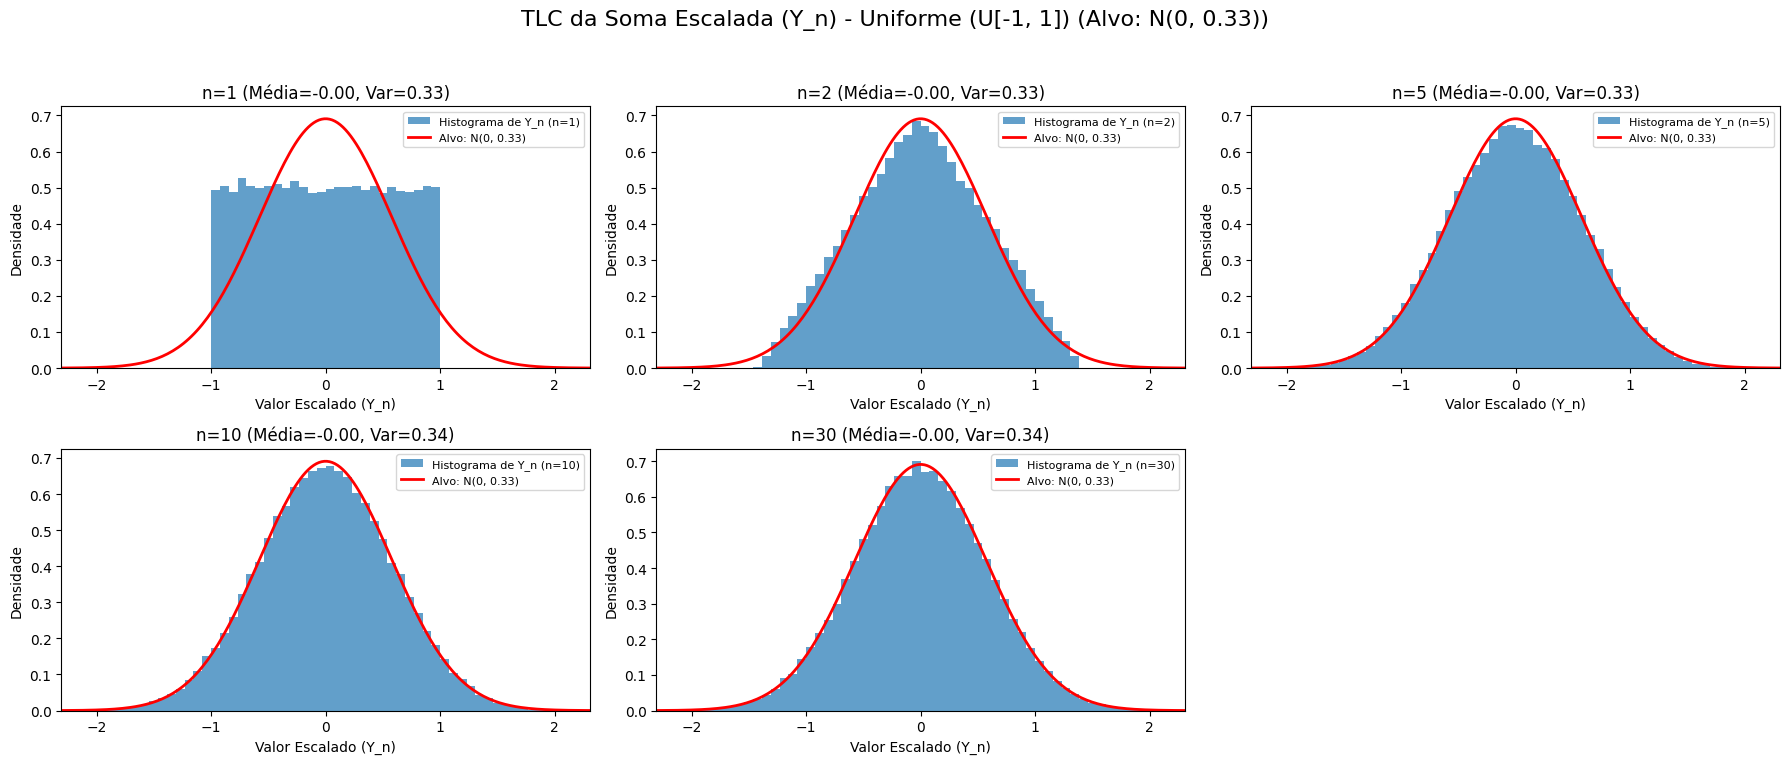

In [19]:
# --- Teste 1: Distribuição UNIFORME DE MÉDIA ZERO ---

# 1. Definir a função da distribuição (média zero)
dist_uniforme_zero = lambda size: np.random.uniform(low=-1.0, high=1.0, size=size)

# 2. Definir o desvio padrão teórico (σ)
sigma_unif = np.sqrt(1/3) # Variância é 1/3

# 3. Chamar a função de simulação
simular_clt_scaled_sum(dist_uniforme_zero, "Uniforme (U[-1, 1])", sigma_teorico=sigma_unif)

### 📊 Teste 2: Distribuição Exponencial (Média Zero)

O nosso próximo teste é a **Distribuição Exponencial**. Esta distribuição é um desafio excelente para o TLC, pois é **altamente assimétrica** (não tem nada de "sino").

A distribuição Exponencial padrão $Exp(\lambda)$ tem Média $\mu = 1/\lambda$. Para satisfazer a condição da teoria ($E[X_i] = 0$), precisamos "deslocar" a distribuição.

Vamos criar uma nova variável $X' = X - \mu$, onde $X \sim Exp(\lambda)$.

**Parâmetros Teóricos para $X \sim Exp(\lambda=1)$:**
(Usaremos $\lambda=1$ para simplicidade, o que significa `scale=1` no numpy)

1.  **Média ($\mu$):**
    $\mu = 1/\lambda = 1/1 = 1$
2.  **Variância ($\sigma^2$):**
    $\sigma^2 = 1/\lambda^2 = 1/1^2 = 1$

**Nossa Variável de Média Zero (X'):**
* Será $X' = X - 1$.
* A Média de $X'$ é $E[X'] = E[X] - 1 = 1 - 1 = 0$. *(Condição satisfeita)*
* A Variância de $X'$ é $Var(X') = Var(X) = 1$. (O deslocamento não altera a variância).

**O que observar:**
A nossa curva alvo (linha vermelha) será a **$N(0, 1)$**. Vamos observar como o histograma de $Y_n$ (azul), que começa como uma curva exponencial deslocada (para $n=1$), converge rapidamente para a Normal Padrão.

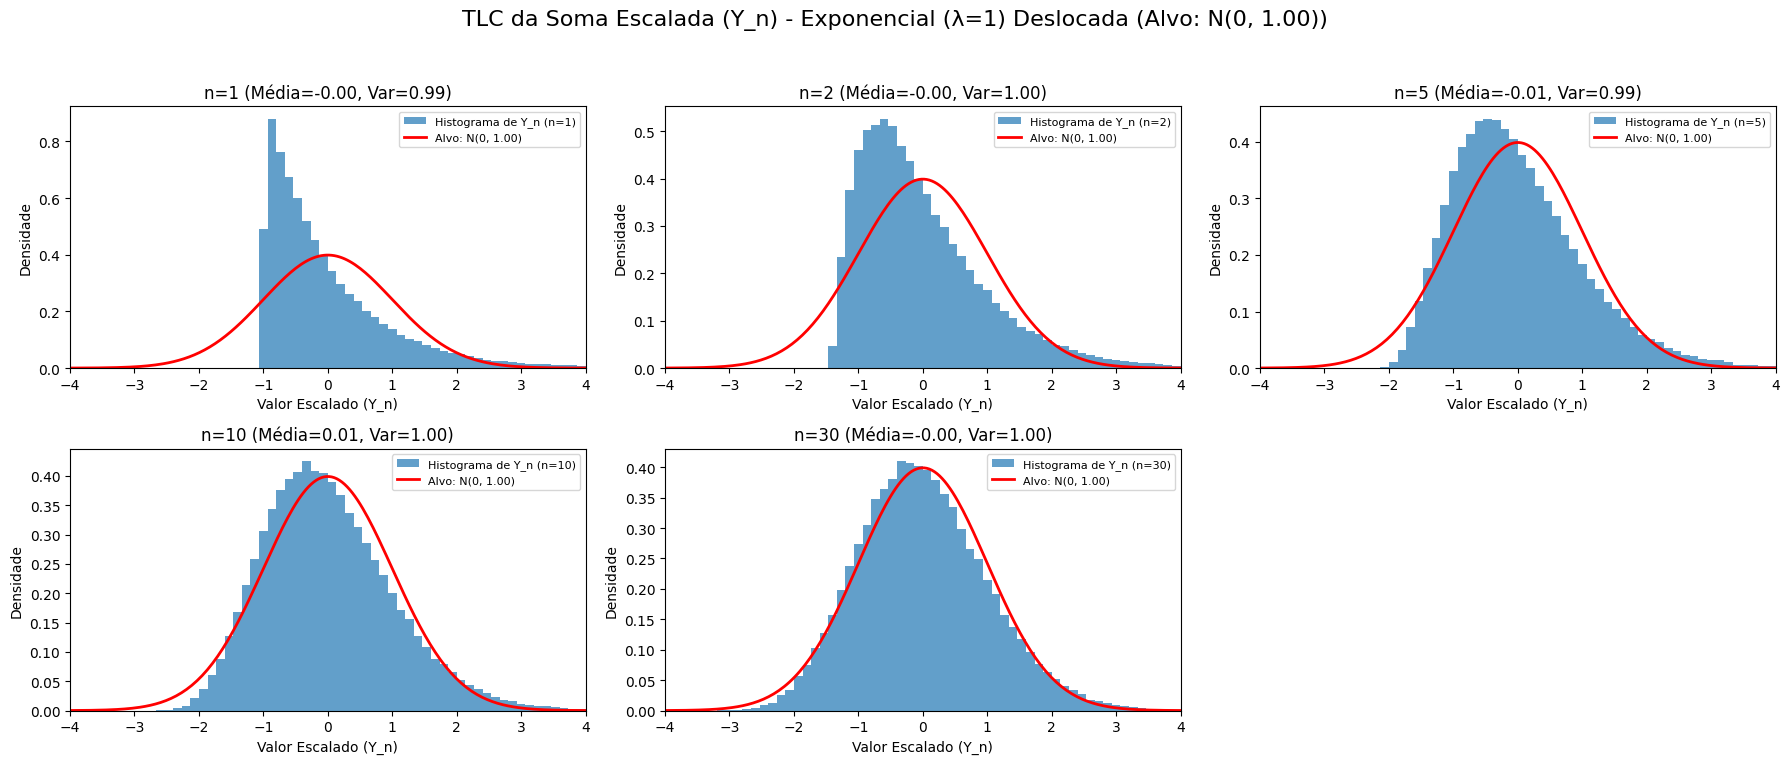

In [20]:
# --- Teste 2: Distribuição EXPONENCIAL DE MÉDIA ZERO ---


# 1. Definir a função da distribuição (média zero)
# Geramos Exp(scale=1) e subtraímos sua média (1.0)
dist_exp_zero = lambda size: np.random.exponential(scale=1.0, size=size) - 1.0

# 2. Definir o desvio padrão teórico (σ)
# A variância é 1, então o desvio padrão também é 1.
sigma_exp = 1.0

# 3. Chamar a função de simulação
# A função simular_clt_scaled_sum foi definida na Célula 3
simular_clt_scaled_sum(dist_exp_zero, "Exponencial (λ=1) Deslocada", 
                     sigma_teorico=sigma_exp)

### 📊 Teste 3: Distribuição de Poisson (Média Zero)

O nosso terceiro teste é a **Distribuição de Poisson**. Este caso é interessante por dois motivos:
1.  É uma distribuição **discreta** (gera apenas números inteiros: 0, 1, 2...).
2.  É **assimétrica** para valores baixos de $\lambda$.

Tal como a Exponencial, a Poisson $Pois(\lambda)$ tem uma média não-zero ($\mu = \lambda$). Portanto, vamos criar uma variável deslocada $X' = X - \lambda$.

**Parâmetros Teóricos para $X \sim Pois(\lambda=3)$:**
(Usaremos $\lambda=3$, um valor que gera uma leve assimetria)

1.  **Média ($\mu$):**
    $\mu = \lambda = 3$
2.  **Variância ($\sigma^2$):**
    $\sigma^2 = \lambda = 3$

**Nossa Variável de Média Zero (X'):**
* Será $X' = X - 3$.
* A Média de $X'$ é $E[X'] = E[X] - 3 = 3 - 3 = 0$. *(Condição satisfeita)*
* A Variância de $X'$ é $Var(X') = Var(X) = 3$.

**O que observar:**
A nossa curva alvo (linha vermelha) será a **$N(0, 3)$**. Vamos observar como o histograma de $Y_n$ (azul), que começa como um conjunto de barras discretas (para $n=1$), "borra" e se transforma em uma curva Normal contínua que se encaixa na curva alvo.

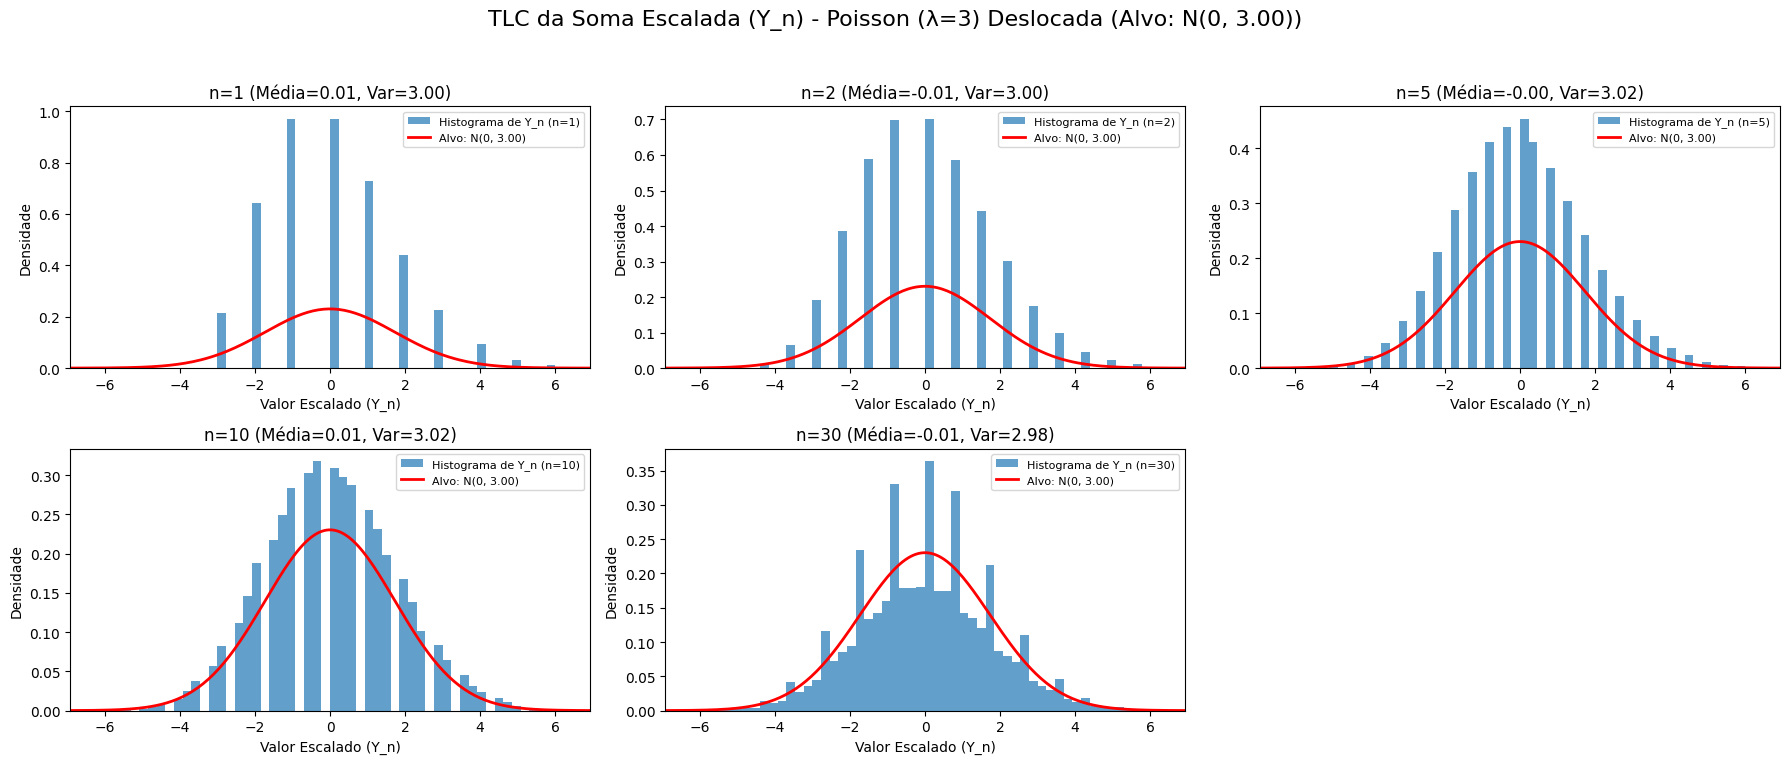

In [21]:
# --- Teste 3: Distribuição POISSON DE MÉDIA ZERO ---



# 1. Definir a função da distribuição (média zero)
# Geramos Pois(lam=3) e subtraímos sua média (3.0)
dist_poisson_zero = lambda size: np.random.poisson(lam=3, size=size) - 3.0

# 2. Definir o desvio padrão teórico (σ)
# A variância é 3, então o desvio padrão é sqrt(3)
sigma_poisson = np.sqrt(3)

# 3. Chamar a função de simulação
# A função simular_clt_scaled_sum foi definida na Célula 3
simular_clt_scaled_sum(dist_poisson_zero, "Poisson (λ=3) Deslocada", 
                     sigma_teorico=sigma_poisson)

### 📊 Teste 4: Distribuição Bimodal (Simétrica)

Nosso teste final é o mais desafiador: uma **Distribuição Bimodal Simétrica**. Esta distribuição tem uma forma de "camelo" (dois picos), que é visualmente o oposto da forma de "sino" (pico único) da Normal.

Para criar esta distribuição, vamos fazer uma mistura 50/50 de duas distribuições Normais, uma centrada em $-3$ e outra em $+3$.
$X \sim 0.5 \cdot N(-3, 1) + 0.5 \cdot N(3, 1)$

**Parâmetros Teóricos:**

1.  **Média ($\mu$):**
    Por simetria, a média é zero.
    $\mu = 0.5 \cdot (-3) + 0.5 \cdot (3) = 0$
    *(Condição satisfeita)*

2.  **Variância ($\sigma^2$):**
    O cálculo é $E[X^2] - (E[X])^2$. Como $E[X]=0$, $\sigma^2 = E[X^2]$.
    $E[X^2] = 0.5 \cdot E[X_1^2] + 0.5 \cdot E[X_2^2]$ (onde $X_1 \sim N(-3,1)$ e $X_2 \sim N(3,1)$)
    Lembrando que $E[X^2] = Var(X) + (E[X])^2$:
    * $E[X_1^2] = 1 + (-3)^2 = 10$
    * $E[X_2^2] = 1 + (3)^2 = 10$
    * $E[X^2] = 0.5 \cdot 10 + 0.5 \cdot 10 = 10$
    Portanto, $\sigma^2 = 10$.

**O que observar:**
A nossa curva alvo (linha vermelha) será a **$N(0, 10)$**. Vamos observar como os dois picos do histograma azul (para $n=1$) se fundem (em $n=2, 5$) e colapsam em um único sino que se encaixa perfeitamente na curva alvo.

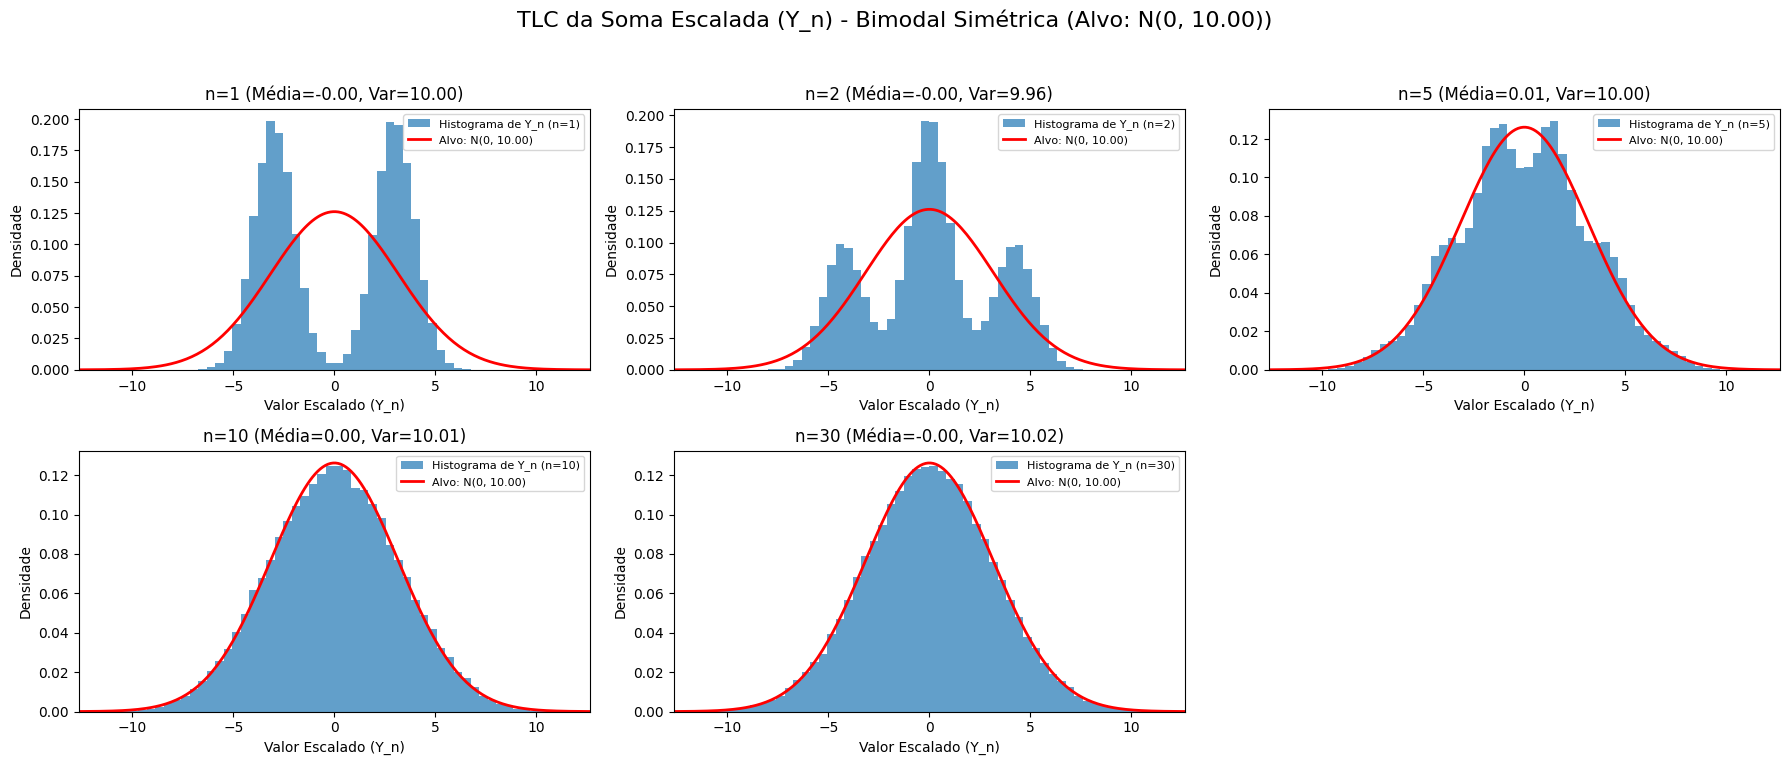

In [22]:
# --- Teste 4: Distribuição BIMODAL DE MÉDIA ZERO ---


# 1. Definir a função da distribuição (média zero)
def dist_bimodal_zero(size):
    """
    Gera dados bimodais misturando duas normais: N(-3, 1) e N(3, 1).
    'size' é uma tupla (n_experimentos, n)
    """
    total_samples = np.prod(size)
    
    # Gerar metade de cada uma das duas normais
    n_half = total_samples // 2
    n_other_half = total_samples - n_half
    
    # Definir os dois picos (modos)
    samples1 = np.random.normal(loc=-3.0, scale=1.0, size=n_half)
    samples2 = np.random.normal(loc=3.0, scale=1.0, size=n_other_half)
    
    # Combinar, embaralhar e remodelar para o formato (n_experimentos, n)
    combined_samples = np.concatenate([samples1, samples2])
    np.random.shuffle(combined_samples)
    
    return combined_samples.reshape(size)

# 2. Definir o desvio padrão teórico (σ)
# A variância é 10, então o desvio padrão é sqrt(10)
sigma_bimodal = np.sqrt(10)

# 3. Chamar a função de simulação
# A função simular_clt_scaled_sum foi definida na Célula 3
simular_clt_scaled_sum(dist_bimodal_zero, "Bimodal Simétrica", 
                     sigma_teorico=sigma_bimodal)

## 🔬 Conclusões Finais

Este notebook demonstrou numericamente o Teorema do Limite Central (TLC) na sua formulação da "soma escalada" ($Y_n = S_n / \sqrt{n}$).

Através dos testes com as distribuições **Uniforme**, **Exponencial**, **Poisson** e **Bimodal**, pudemos constatar visualmente que, independentemente da forma da distribuição original $X_i$ (plana, assimétrica, discreta ou bimodal), a distribuição da sua soma escalada $Y_n$ converge para a distribuição Normal $N(0, \sigma^2)$ à medida que $n$ aumenta.

### A "Velocidade" da Convergência

Uma das observações mais importantes do projeto veio do **Teste 2 (Exponencial)**, onde notamos que, para valores baixos de $n$, o histograma (azul) **não se encaixava perfeitamente** na curva normal alvo (vermelha).

Essa é a demonstração visual de que a convergência é **assintótica** (gradual).

A "velocidade" com que $Y_n$ converge para a Normal depende diretamente das características da distribuição original:

1.  **Distribuições Simétricas (Ex: Uniforme $U(-1, 1)$):**
    A convergência é **muito rápida**. A distribuição original (um retângulo) já é simétrica, e o histograma para $n=2$ (um triângulo) já se assemelha muito a um sino.

2.  **Distribuições Assimétricas (Ex: Exponencial ou Poisson):**
    A convergência é **mais lenta**. A distribuição original possui uma "skewness" (assimetria) significativa. O TLC precisa de um $n$ maior para "cancelar" essa assimetria e formar a curva de sino simétrica.

3.  **Distribuições Complexas (Ex: Bimodal Simétrica):**
    Este foi o teste mais impressionante. Mesmo começando com uma distribuição simétrica, sua forma (dois picos) está longe de ser normal. Vimos o TLC em ação ao fundir os dois picos em um único sino central que, para $n=30$, se encaixava perfeitamente na curva alvo $N(0, 10)$.

Em todos os casos, $n=30$ mostrou-se suficiente para uma excelente aproximação, confirmando o poder e a universalidade do Teorema do Limite Central.